<a href="https://colab.research.google.com/github/Yon2025/C/blob/main/dataanakysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Kall.csv to Kall.csv


In [5]:
df = pd.read_csv("Kall.csv")
df.head()

,name,tree number,species number,UHItemp,Pm25,NO2,Greenland amount,longitude,latitude,Unnamed: 9
0,A1,25,9,4,7,6,27,-0.140886,51.566972,NaN
1,A2,41,13,4,9,8,6,-0.1359916,51.566848,NaN
2,A3,66,16,7,9,8,13,-0.140441,51.564216,NaN
3,A4,51,11,4,2,2,11,-0.140687,51.563244,NaN
4,A5,31,8,6,8,8,2,-0.140776,51.561735,NaN


In [6]:
df.shape

(64, 10)

In [7]:
df.describe()

,tree number,species number,UHItemp,Pm25,Greenland amount,latitude,Unnamed: 9
count,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,0.0
mean,23.03125,5.859375,3.828125,4.593750,7.171875,51.562472,NaN
std,19.17668,3.181630,2.333705,2.670942,7.312860,0.003033,NaN
min,2.00000,1.000000,1.000000,1.000000,0.000000,51.557617,NaN
25%,6.75000,3.750000,2.000000,2.000000,2.750000,51.559993,NaN
50%,19.00000,6.000000,3.000000,4.500000,5.000000,51.562503,NaN
75%,32.25000,8.000000,6.000000,7.000000,8.000000,51.565014,NaN
max,102.00000,16.000000,10.000000,9.000000,36.000000,51.567205,NaN


In [8]:
df.dtypes

name                 object
tree number           int64
species number        int64
UHItemp               int64
Pm25                  int64
NO2                  object
Greenland amount      int64
longitude            object
latitude            float64
Unnamed: 9          float64
dtype: object

In [9]:
df.isnull().sum()

name                 0
tree number          0
species number       0
UHItemp              0
Pm25                 0
NO2                  0
Greenland amount     0
longitude            0
latitude             0
Unnamed: 9          64
dtype: int64

In [10]:
plt.style.use('fivethirtyeight')

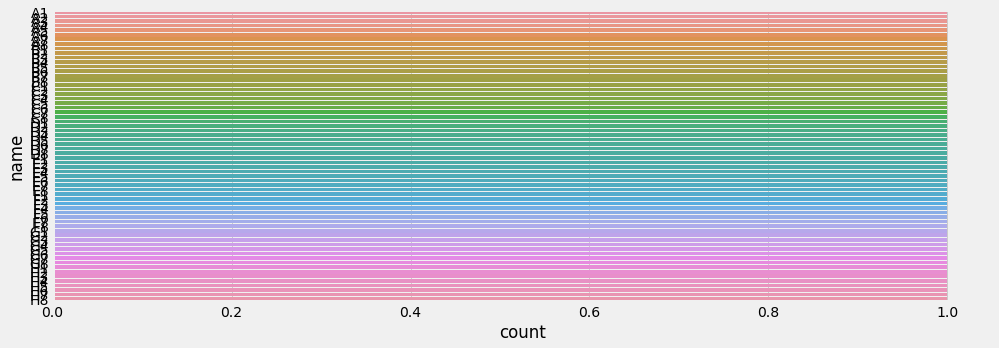

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'name' , data = df)
plt.show()

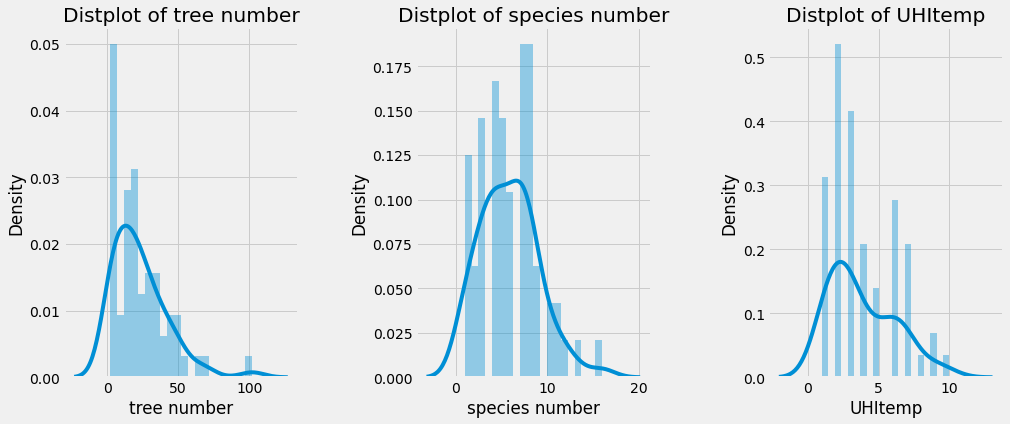

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['tree number' , 'species number' , 'UHItemp']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

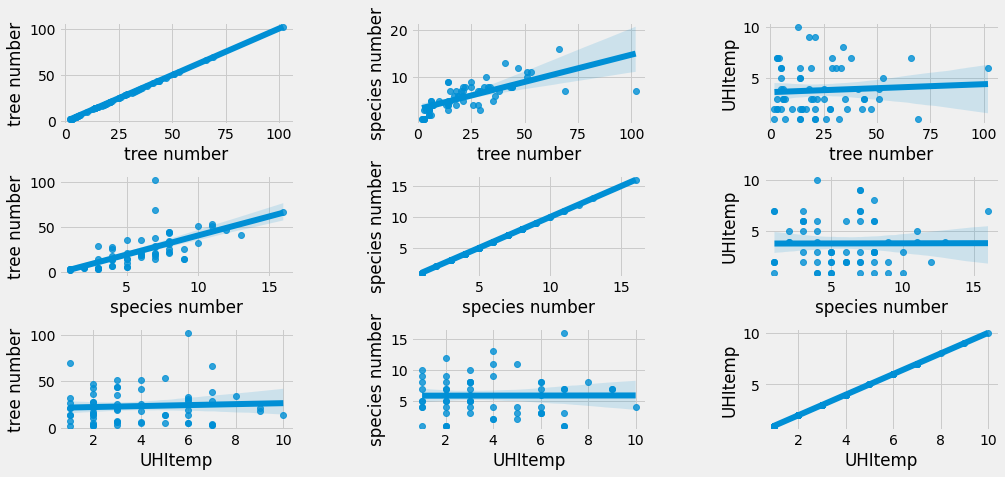

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['tree number' , 'species number' , 'UHItemp']:
    for y in ['tree number' , 'species number' , 'UHItemp']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [13]:
'''tree number and UHItemp'''
X1 = df[['tree number' , 'UHItemp']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

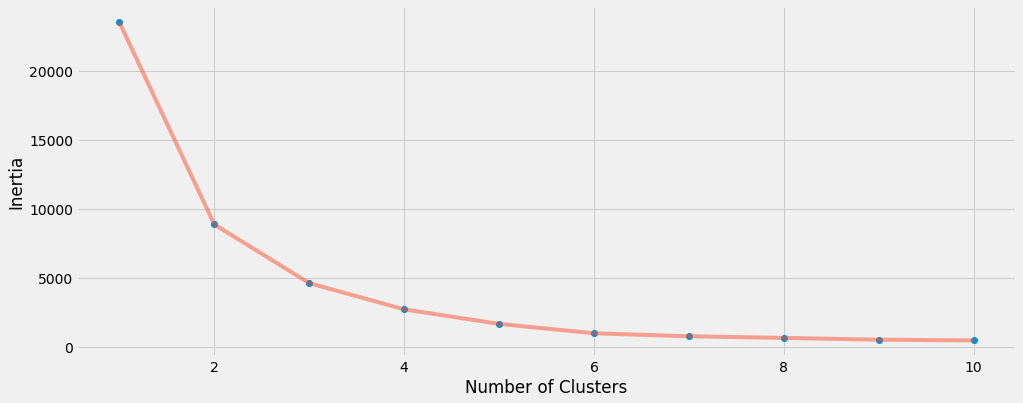

In [14]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [15]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [26]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

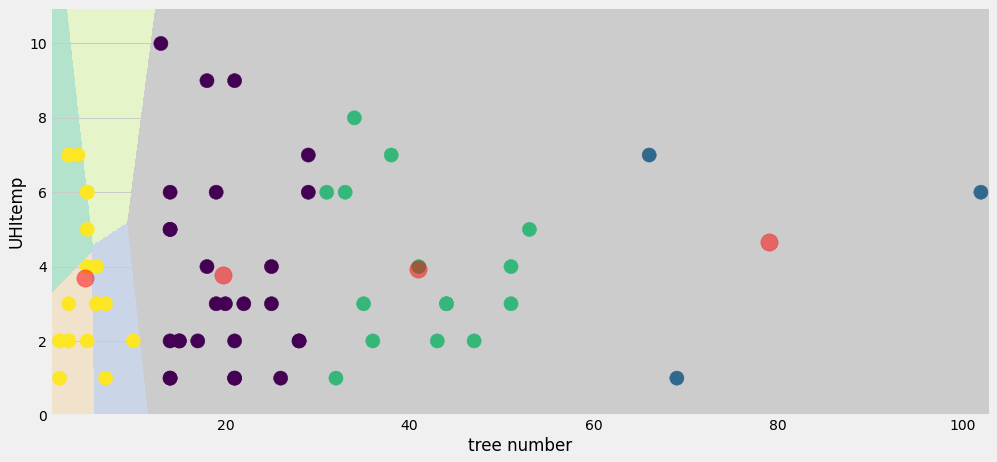

In [27]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'tree number' ,y = 'UHItemp' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('UHItemp') , plt.xlabel('tree number')
plt.show()

df.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='out1.csv')  
df.to_csv('out1.zip', index=False,
          compression=compression_opts)

In [28]:
'''species number and UHItemp'''
X2 = df[['species number' , 'UHItemp']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

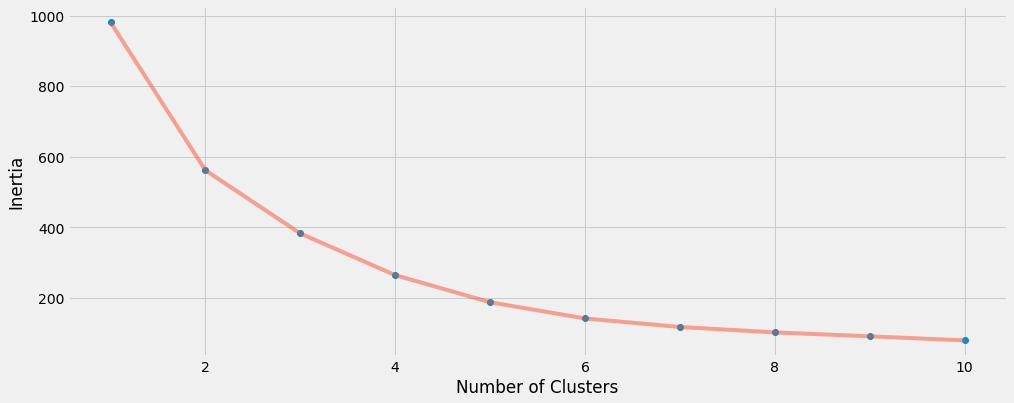

In [29]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [30]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [31]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

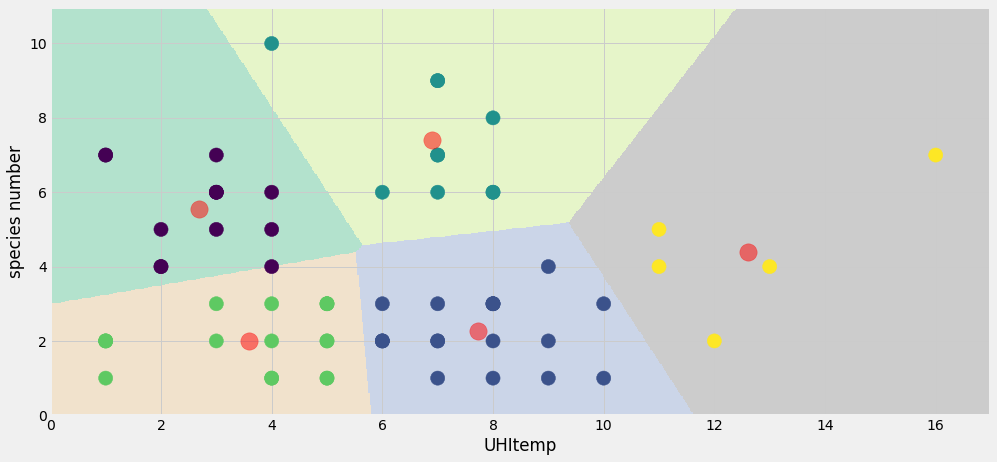

In [32]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'species number' ,y = 'UHItemp' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('species number') , plt.xlabel('UHItemp')
plt.show()

df.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)    


In [33]:
X3 = df[['tree number' , 'species number' ,'UHItemp']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

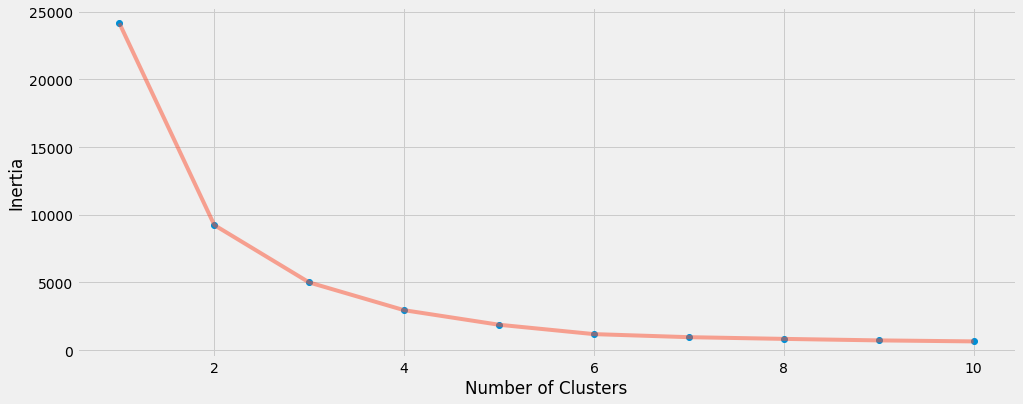

In [34]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [35]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [36]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['tree number'],
    y= df['species number'],
    z= df['UHItemp'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 15
        ),
        opacity=1
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'tree number'),
            yaxis = dict(title  = 'species number'),
            zaxis = dict(title  = 'UHItemp')
        )
)
fig = go.Figure(data=data, layout=layout)
plt.show(fig)
py.offline.iplot(fig)

df.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='out3.csv')  
df.to_csv('ou3t.zip', index=False,
          compression=compression_opts) 